# Titanic: Machine Learning from Disaster

- Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing



---



# 1. Defining the problem 

 : 타이타닉 생존자를 예측하라 



# 2. Collecting the data


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 3. 데이터 분석하기




In [ ]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape 

(891, 12)

In [ ]:
test.shape

(418, 11)

 - 트레인 세트에는 891행과, 12개의 열이 테스트 세트에는 418행, 11열로 이루어진 데이터가 있다.

In [ ]:
train.info() #null 값을 카운트하고 데이터타입을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 - 유실된 데이터들을 메꾸는 작업이 필요하다.
특히 케빈 데이터는 204개의 데이터밖에 없다.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.isnull().sum() #null값의 합

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#시각화 위한 라이브러리 세팅
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
# 바 차트 만들기, 차트자체를 생성해주고 아래서 특징들을 넣어주면서 분류시작
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead'] # 0은 ms, 이런식으로 나타낼 수 있는지? 확인
    df.plot(kind='bar',stacked=True, figsize=(10,5))

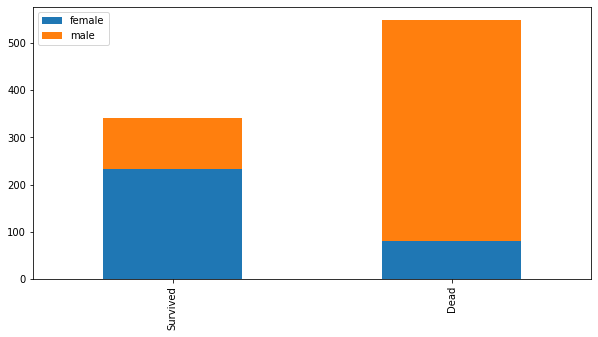

In [ ]:
bar_chart('Sex') #분류시작

 - 남자<여자 살 확률이 높았다.


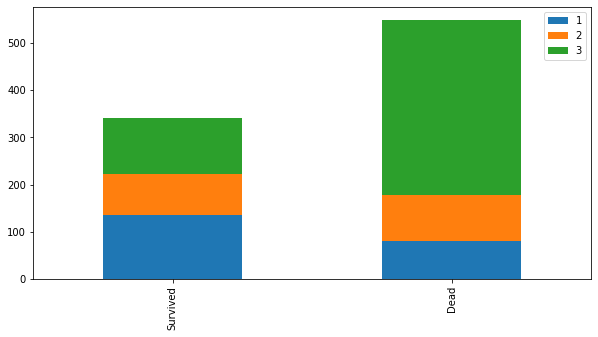

In [ ]:
bar_chart('Pclass')

 - 3등석<2등석<1등석 순으로 살 확률 높았다.

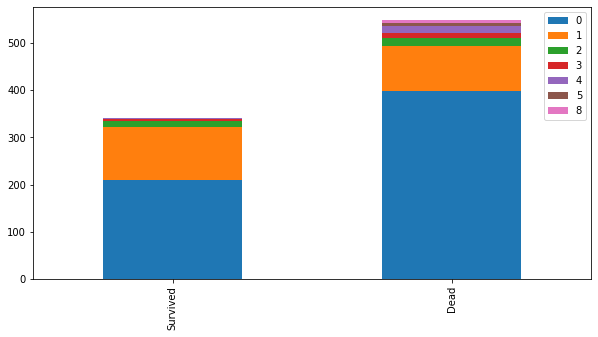

In [ ]:
bar_chart('SibSp')

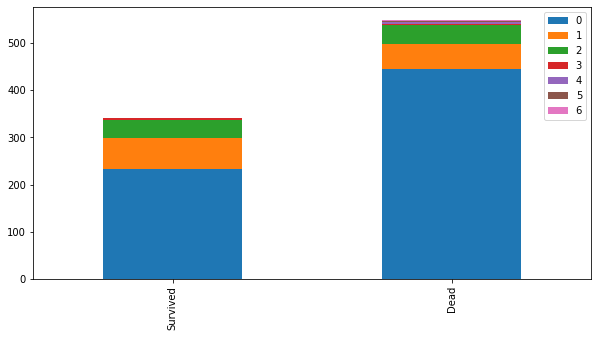

In [ ]:
bar_chart('Parch')

 - 형제, 자매, 가족이 있는지 여부는 살 확률에 유의미한 영향을 미치는 것 같지 않다.
또한 형제,자매,가족이 있는지 여부는 중복되어 합산될 확률이 있다.

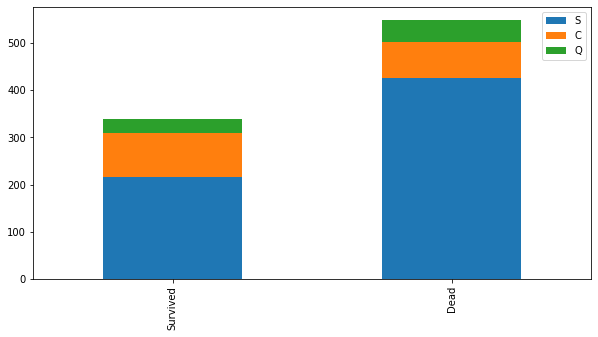

In [ ]:
bar_chart('Embarked')

 - 1등급<2등급<3등급 순으로 살 확률이 높았다.
이는 등급에 따른 선실 배치도의 문제로 파악된다.

# 4. Feature engineering

 : 데이터 전처리를 통해 특성을 만들어준다.
 데이터는 컴퓨터가 이해할 수 있도록 0, 1 등의 정수로 바꿔준다.

In [ ]:
train.head() #항상 하기전에 head불러서 목적 리마인드

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_test_data = [train, test] #트레인+테스트셋을 묶는다, 묶는 이유는 데이터를 동시에 처리하기 위해서

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #이해가 필요해, 아마 타이틀을 빼내는 과정?

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


# 이름

In [ ]:
train_test_data = [train, test] 

for dataset in train_test_data: #네임에서 타이틀을 뽑으려고 하는게 이름을 세분화하여 그룹으로 구분짓는 것
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Ms            1
Lady          1
Jonkheer      1
Mme           1
Countess      1
Sir           1
Capt          1
Name: Title, dtype: int64

In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Ms            1
Lady          1
Jonkheer      1
Mme           1
Countess      1
Sir           1
Capt          1
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


- Mr : 0
- Miss : 1
- Mrs: 2
- Others: 3

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


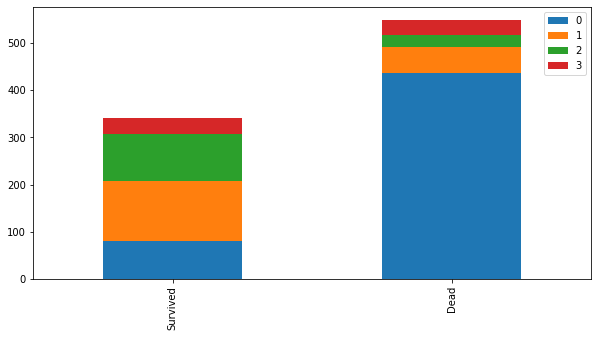

In [ ]:
bar_chart('Title')

# 성별

- male:0
- female=1

In [ ]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

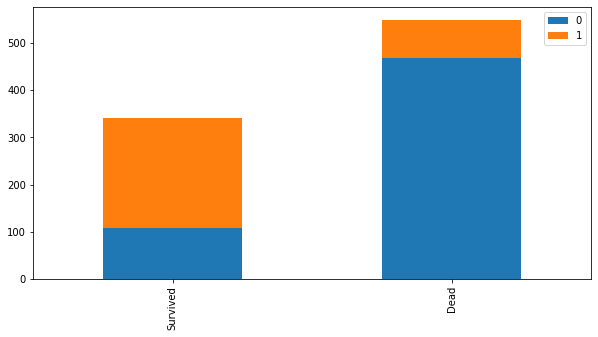

In [ ]:
bar_chart('Sex')

In [ ]:
# 4. 나이

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


# 요금

유실된 데이터에 각 클래스의 중간값을 넣어준다.

In [ ]:
#요금 값을 컴퓨터가 이해할 수 있는 데이터로 바꿔준다.


In [ ]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True) #P 클래스별로 바꿔죠,그거를 중앙값으로 바꿔서 비어있는 공간(na)에 넣어줘(fill), 1등석에 빈 값이 있다면 1등섭 값의 중앙값을 na값에 넣어줘
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True) 

train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


In [ ]:
#나이 빠진 값 넣기
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True) #P 클래스별로 바꿔죠,그거를 중앙값으로 바꿔서 비어있는 공간(na)에 넣어줘(fill), 1등석에 빈 값이 있다면 1등섭 값의 중앙값을 na값에 넣어줘
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True) 

train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


In [ ]:
#트레인, 테스트로 나눠서 해야지됨/ combine으로 하면 오류남
train.loc[ train['Age'] <= 10, 'Age'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 20), 'Age'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] <= 26), 'Age'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] <= 30), 'Age'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 36), 'Age'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] <= 40), 'Age'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] <= 46), 'Age'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] <= 50), 'Age'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age'] = 9
train.loc[ train['Age'] > 60, 'Age'] = 10

In [ ]:
test.loc[ test['Age'] <= 10, 'Age'] = 0
test.loc[(test['Age'] > 10) & (test['Age'] <= 16), 'Age'] = 1
test.loc[(test['Age'] > 16) & (test['Age'] <= 20), 'Age'] = 2
test.loc[(test['Age'] > 20) & (test['Age'] <= 26), 'Age'] = 3
test.loc[(test['Age'] > 26) & (test['Age'] <= 30), 'Age'] = 4
test.loc[(test['Age'] > 30) & (test['Age'] <= 36), 'Age'] = 5
test.loc[(test['Age'] > 36) & (test['Age'] <= 40), 'Age'] = 6
test.loc[(test['Age'] > 40) & (test['Age'] <= 46), 'Age'] = 7
test.loc[(test['Age'] > 46) & (test['Age'] <= 50), 'Age'] = 8
test.loc[(test['Age'] > 50) & (test['Age'] <= 60), 'Age'] = 9
test.loc[ test['Age'] > 60, 'Age'] = 10

# 전처리

In [ ]:
#티켓, 캐빈, 이름, 선박 을 훈련-테스트세트에서 둘 다 없애버리기

test = test.drop(['Ticket', 'Cabin','Name','Embarked'], axis=1)
train = train.drop(['Ticket', 'Cabin', 'Name','Embarked'], axis=1)

combine = [train, test] #아까 묶을 때 함수명이 train_data였음/ 새로운 데이터 묶어서 combine으로 묶어

In [ ]:
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,1,0,3,0,3.0,1,0,7.2500,0
1,2,1,1,1,6.0,1,0,71.2833,2
2,3,1,3,1,3.0,0,0,7.9250,1
3,4,1,1,1,5.0,1,0,53.1000,2
4,5,0,3,0,5.0,0,0,8.0500,0
5,6,0,3,0,4.0,0,0,8.4583,0
6,7,0,1,0,9.0,0,0,51.8625,0
7,8,0,3,0,0.0,3,1,21.0750,3
8,9,1,3,1,4.0,0,2,11.1333,2
9,10,1,2,1,1.0,1,0,30.0708,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,0,5.0,0,0,7.8292,0
1,893,3,1,8.0,1,0,7.0000,2
2,894,2,0,10.0,0,0,9.6875,0
3,895,3,0,4.0,0,0,8.6625,0
4,896,3,1,3.0,1,1,12.2875,2


# 5. Modelling


In [ ]:
# Importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Title        891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [ ]:
feature = ['Pclass', 'Age', 'Sex'] # 이게 방정식이다, 이게 공식이다. 내가 만든 공식이다.
label = ['Survived']

In [ ]:
X_train = train[feature] #트레인 데이터중에서 특성을 빼서 input 값에 넣은 데이터
y_train = train[label] # output 

In [ ]:
X_test = test[feature] #테스트를 해볼거야

In [ ]:
def train_and_test(model): # 모델을 담을 그릇을 만드는 거시앋 ! 예측값을 도출해주는 함수를 만든것
    model.fit(X_train, y_train) #우리의 모델은 891개를 이 줄에서 훈련시키는 것
    prediction = model.predict(X_test) #예측이란, 우리가 만들 모델 안에서 예측한것, 뭐를 예측한 것? 테스트 셋으로 예측한 것
    accuracy = round(model.score(X_train, y_train) * 100, 2) #정확도란? 우리가 만든 모델의 점수를 출력해줘, 위에서 말해준 x,y트레인을 넣어줘, *100은 백분율로 나오는거야, 두자리로 잘라라
    print("Accuracy : ", accuracy, "%") 
    return prediction

In [ ]:
rf_pred=train_and_test(RandomForestClassifier()) # 위에서 만든 그릇에 이 모델(랜덤)을 담아본다=rf_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy :  82.15 %


In [ ]:
sub = pd.DataFrame({ # 데이터프레임을 만드는데, 페신저아이디는 테스트에 있는 페신저 아이디에서 따오자 , 생존여부는 우리가 만든 모델에서 가져온다.
        "PassengerId": test["PassengerId"],
        "Survived": rf_pred
    })

sub.to_csv('sub.csv', index=False) #우리가 만든 이 과정을 타이타닉 csv파일로 내보낸다.